In [2]:
from sklearn.datasets import load_wine
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
LW=load_wine()
data=LW.data
names=LW.feature_names
df=pd.DataFrame(data=data,columns=names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
x=df['alcohol']

# Histograma

<AxesSubplot: >

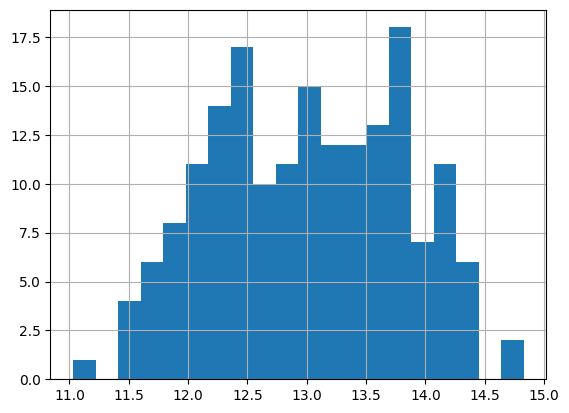

In [5]:
x.hist(bins=20) # Rango de alchol lo divide entre 20. Cuántas veces aparece

(array([ 1., 10., 19., 31., 21., 27., 25., 25., 17.,  2.]),
 array([11.03, 11.41, 11.79, 12.17, 12.55, 12.93, 13.31, 13.69, 14.07,
        14.45, 14.83]),
 <BarContainer object of 10 artists>)

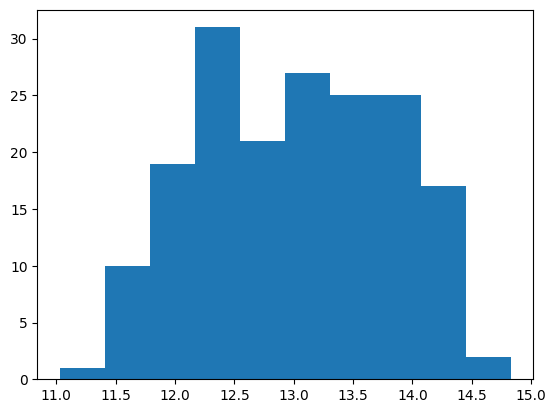

In [6]:
plt.hist(x) # Conteos primer array #limites segundo array (Número de apariciones de un mismo valor), Entre limite y limite se llaman contenedores.


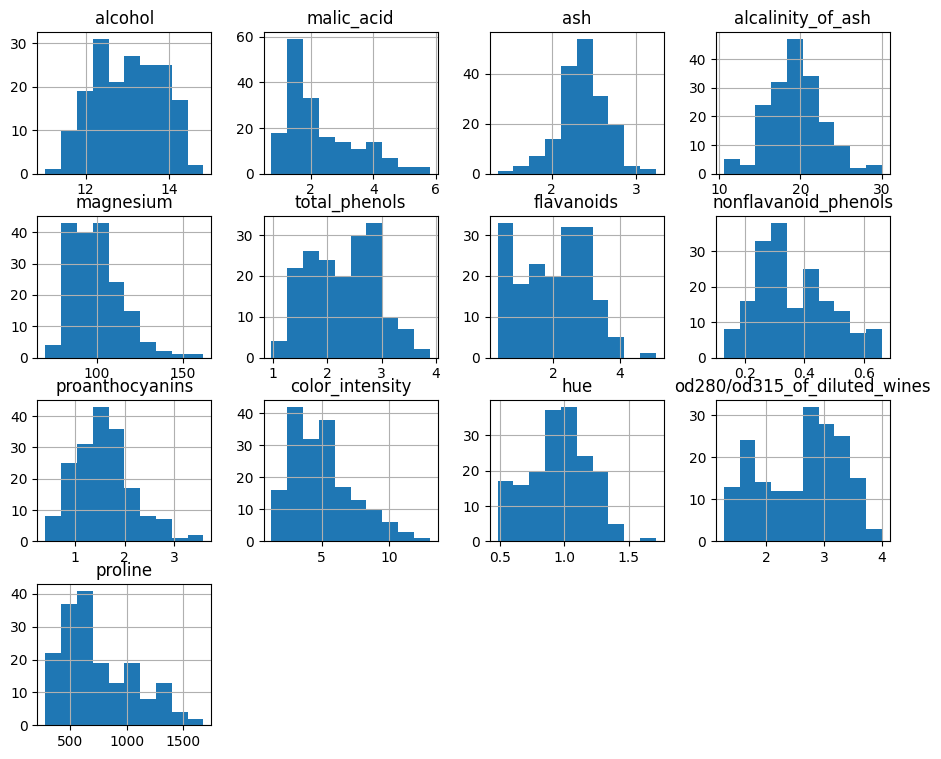

In [7]:
h=df.hist(figsize=(11,9))

# Medidas de posición

In [8]:
#@title Media Aritmética
x.mean()

13.00061797752809

In [9]:

np.mean(x)

13.00061797752809

In [10]:
#@title media recortada
# queremos ver valores por encima de 14 y debajo de 12 (nada más porque si)
stats.tmean(x,(12,14))

12.983576642335766

In [11]:
# Omitir el 25% de los datos más pequeños y el 25% de los datos más grandes
stats.trim_mean(x,0.25)

13.008555555555558

In [12]:
#@title Media ponderada. Puedes especificar la ponderación para cada observación
np.average(x)

13.00061797752809

In [13]:
x.shape

(178,)

In [14]:
w=np.ones(x.shape)
w[0]=2
w
# multiplico elemento por elemento. Y ya saca el promedio. 
np.average(x, weights=w)

13.007486033519553

In [15]:
#@title Media geométrica
# media por ejemplo de un cubo. Raiz a la 178 de todos los elementos multiplicados
stats.gmean(x)

12.975278352602606

In [16]:
#@title Media Armónica
stats.hmean(x)  # gmean >= hmean. Sin observaciones en 0 o negativas.


12.949820740397147

In [17]:
# Tarea: De 10 variable diferentes calcular la armonica, geométrica y aritmética y corroborar que se cumpla gmean >= hmean

## Moda

In [18]:
#@ title moda
x.mode()

0    12.37
1    13.05
Name: alcohol, dtype: float64

In [19]:
mo=stats.mode(x)
mo

C:\Users\anhernan\AppData\Local\Temp\ipykernel_23384\3682490482.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mo=stats.mode(x)


ModeResult(mode=array([12.37]), count=array([6]))

In [20]:
mo[0] # Primera incidencia que más se repite

array([12.37])

In [21]:
mo[1] # número de veces encontrada

array([6])

In [22]:
#@title Cuantiles/percentiles. Ubicado en el 25% de los datos. Si le divides entre 4 son cuartiles.
x.quantile(0.25) # Primer cuartil

12.362499999999999

In [23]:
Q=x.quantile((0.25,0.75)) # Los primeros números de aquí son proporciones, los segundos valores
Q

0.25    12.3625
0.75    13.6775
Name: alcohol, dtype: float64

In [24]:
# Para saber lo que hay en cada cuartil se accede asi 
Q[0.25]

12.362499999999999

In [25]:
Q[0.75]

13.6775

In [26]:
# Deciles
np.quantile(x,0.1) # Primer decil

11.933

In [27]:
Q = np.quantile(x, [0.1,0.2,0.3])
Q

array([11.933, 12.25 , 12.421])

In [28]:
Q[0] # Primer decil

11.933

In [29]:
Q[2] # Segundo decil

12.421

In [30]:
np.percentile(x,50) # Mediana

13.05

# Medidas de disperción

In [31]:
np.var(x) # varianza

0.6553597304633255

In [33]:
np.std(x) # Desviación estandar

0.8095429145285168

In [35]:
np.sqrt(np.var(x))

0.8095429145285168

In [36]:
x.var(ddof=0)# varianza muestral con ddof=1

0.6553597304633255

In [38]:
df.max()-df.min()

alcohol                            3.80
malic_acid                         5.06
ash                                1.87
alcalinity_of_ash                 19.40
magnesium                         92.00
total_phenols                      2.90
flavanoids                         4.74
nonflavanoid_phenols               0.53
proanthocyanins                    3.17
color_intensity                   11.72
hue                                1.23
od280/od315_of_diluted_wines       2.73
proline                         1402.00
dtype: float64

In [39]:
np.max(df)

c:\Users\anhernan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


alcohol                           14.83
malic_acid                         5.80
ash                                3.23
alcalinity_of_ash                 30.00
magnesium                        162.00
total_phenols                      3.88
flavanoids                         5.08
nonflavanoid_phenols               0.66
proanthocyanins                    3.58
color_intensity                   13.00
hue                                1.71
od280/od315_of_diluted_wines       4.00
proline                         1680.00
dtype: float64

In [40]:
np.ptp(x)

3.8000000000000007

In [41]:
stats.iqr(x,rng=(0,100))

3.8000000000000007

In [42]:
# Rango intercuartílico
stats.iqr(x)

1.3150000000000013

In [45]:
q3,q1 = np.quantile(x,[0.75, 0.25])
print(q3)
print(q1)

13.6775
12.362499999999999


In [46]:
q3-q1 # stats.iqr(x)

1.3150000000000013

In [47]:
q3,q1 = x.quantile([0.75,0.25])
print(q3)
print(q1)

13.6775
12.362499999999999


In [48]:
q1=df.quantile(0.25)
q1

alcohol                          12.3625
malic_acid                        1.6025
ash                               2.2100
alcalinity_of_ash                17.2000
magnesium                        88.0000
total_phenols                     1.7425
flavanoids                        1.2050
nonflavanoid_phenols              0.2700
proanthocyanins                   1.2500
color_intensity                   3.2200
hue                               0.7825
od280/od315_of_diluted_wines      1.9375
proline                         500.5000
Name: 0.25, dtype: float64

# Coeficiente de variación de pearson

In [49]:
stats.variation(x)

0.062269571794804905

In [50]:
stats.variation(df)

array([0.06226957, 0.47681402, 0.11560124, 0.17082223, 0.14279209,
       0.27192157, 0.4908411 , 0.34296507, 0.35875872, 0.45704302,
       0.23805811, 0.27108673, 0.42043713])

In [51]:
np.std(df)

alcohol                           0.809543
malic_acid                        1.114004
ash                               0.273572
alcalinity_of_ash                 3.330170
magnesium                        14.242308
total_phenols                     0.624091
flavanoids                        0.996049
nonflavanoid_phenols              0.124103
proanthocyanins                   0.570749
color_intensity                   2.311765
hue                               0.227929
od280/od315_of_diluted_wines      0.707993
proline                         314.021657
dtype: float64

In [52]:
df.mean()

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

# Medidas de forma

In [53]:
df.skew()

alcohol                        -0.051482
malic_acid                      1.039651
ash                            -0.176699
alcalinity_of_ash               0.213047
magnesium                       1.098191
total_phenols                   0.086639
flavanoids                      0.025344
nonflavanoid_phenols            0.450151
proanthocyanins                 0.517137
color_intensity                 0.868585
hue                             0.021091
od280/od315_of_diluted_wines   -0.307285
proline                         0.767822
dtype: float64

99.74157303370787

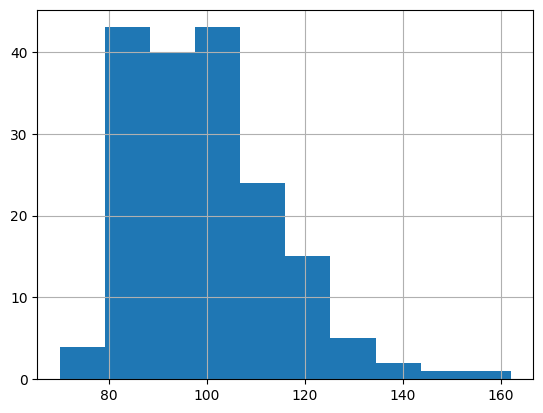

In [57]:
df['magnesium'].hist()
df['magnesium'].mean()

## Curtosis o apuntamiento

In [55]:
x.kurt()

-0.8524995684849164

In [56]:
df.kurt() # Valor positivo en magnesium quiere decir que los datos se acumulan muycho alrededor de la media aritmética 


alcohol                        -0.852500
malic_acid                      0.299207
ash                             1.143978
alcalinity_of_ash               0.487942
magnesium                       2.104991
total_phenols                  -0.835627
flavanoids                     -0.880382
nonflavanoid_phenols           -0.637191
proanthocyanins                 0.554649
color_intensity                 0.381522
hue                            -0.344096
od280/od315_of_diluted_wines   -1.086435
proline                        -0.248403
dtype: float64